# Hierarchical Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/Hierarchical.ipynb)


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/Credit_card.csv'
data = pd.read_csv(file_path)
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [26]:
# Display basic information about the dataset
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


In [27]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [28]:
# Display basic statistical details
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0

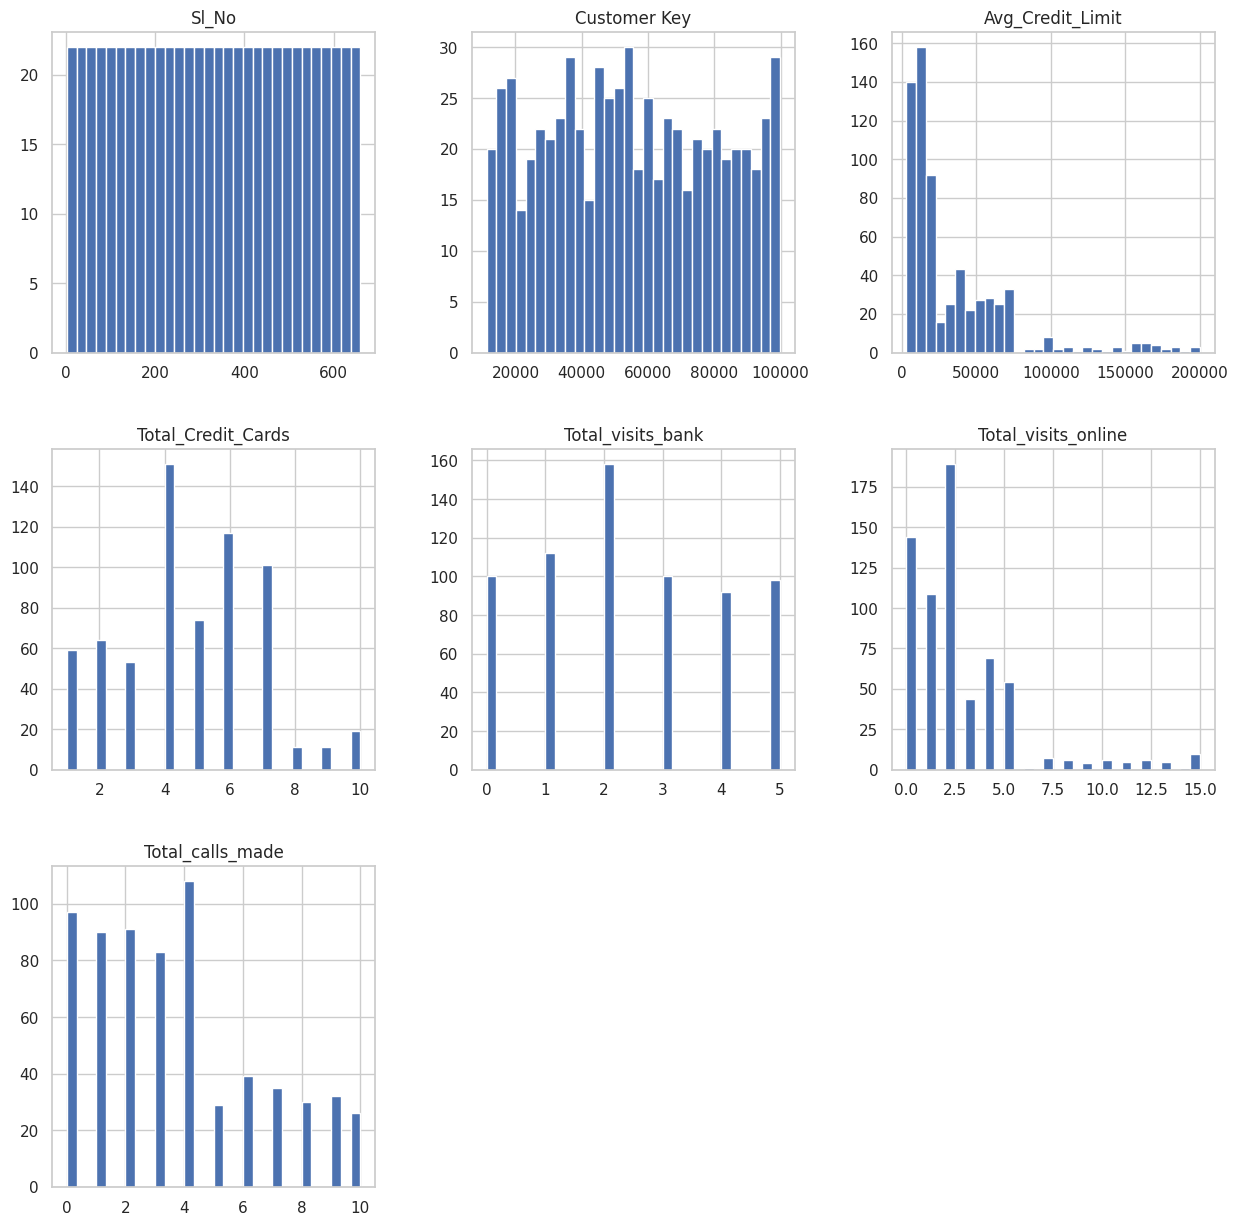

In [29]:
data.hist(bins=30, figsize=(15,15))
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Display the first few rows of the processed dataset
print(data_scaled.head())


      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0 -1.729428      1.246920          1.740187           -1.249225   
1 -1.724180     -0.653203          0.410293           -0.787585   
2 -1.718931     -1.476098          0.410293            1.058973   
3 -1.713683     -0.571901         -0.121665            0.135694   
4 -1.708434     -0.300857          1.740187            0.597334   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0          -0.860451            -0.547490         -1.251537  
1          -1.473731             2.520519          1.891859  
2          -0.860451             0.134290          0.145528  
3          -0.860451            -0.547490          0.145528  
4          -1.473731             3.202298         -0.203739  


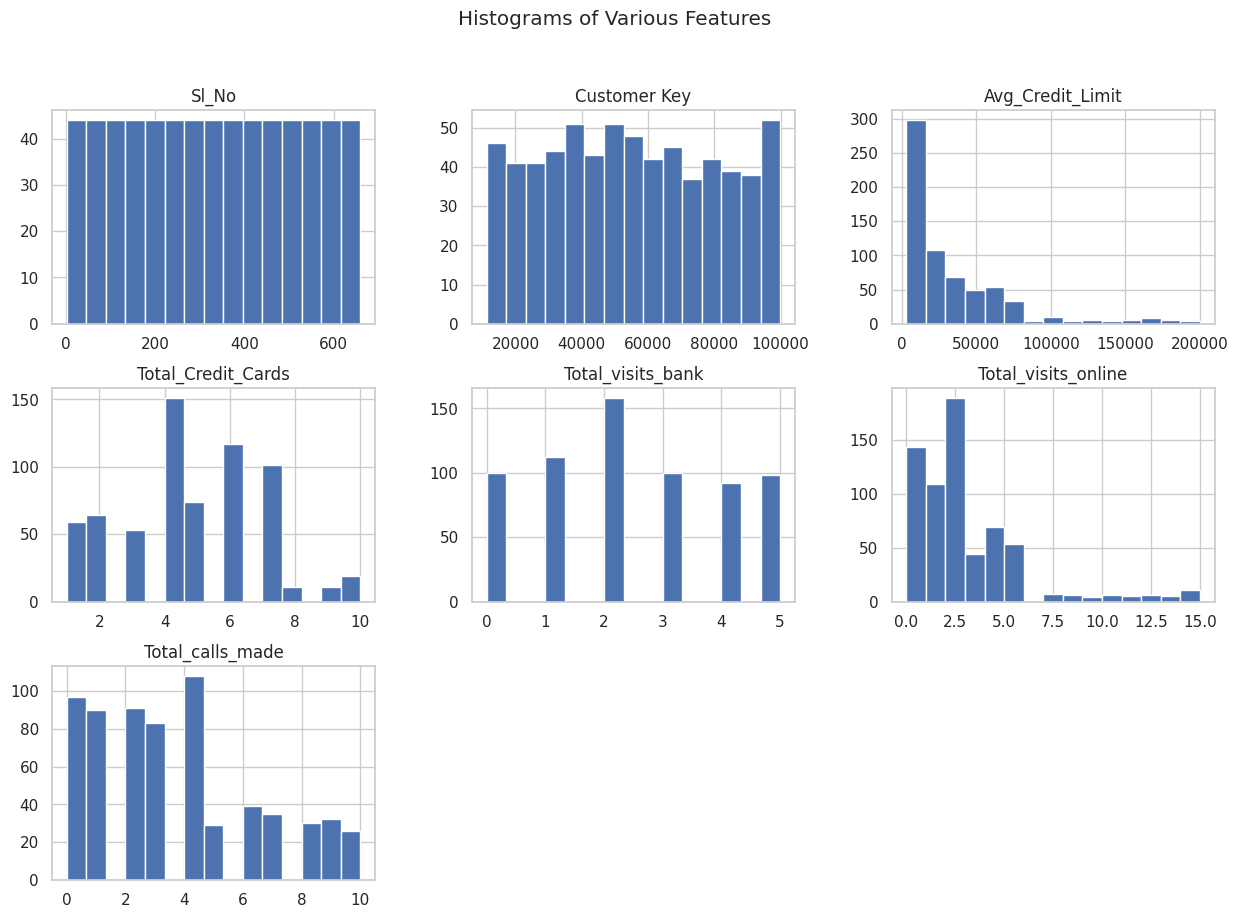

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms/Density Plots
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Various Features')
plt.show()



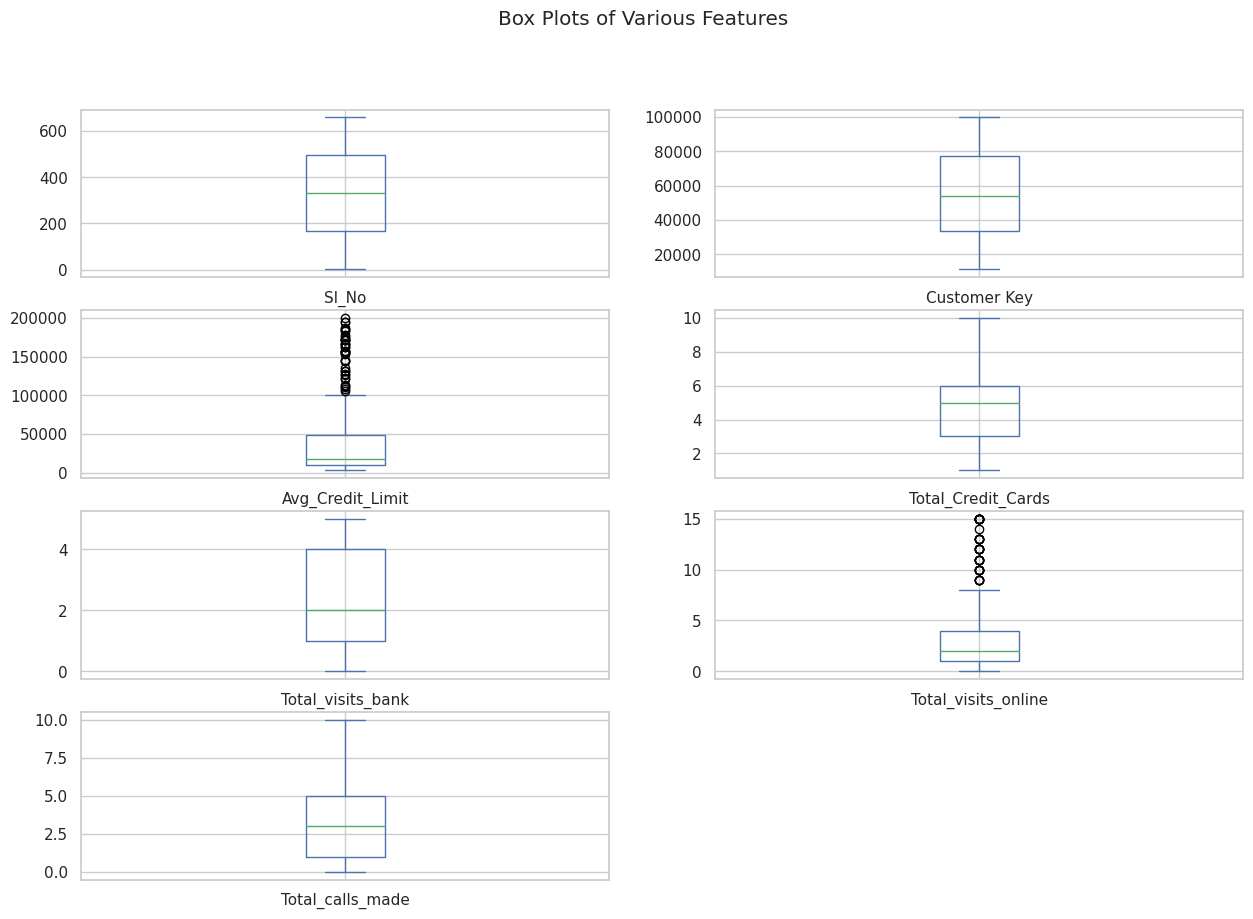

In [32]:

# Box Plots
data.plot(kind='box', subplots=True, layout=(math.ceil(data.shape[1] / 2), 2), sharex=False, sharey=False, figsize=(15,10))
plt.suptitle('Box Plots of Various Features')
plt.show()



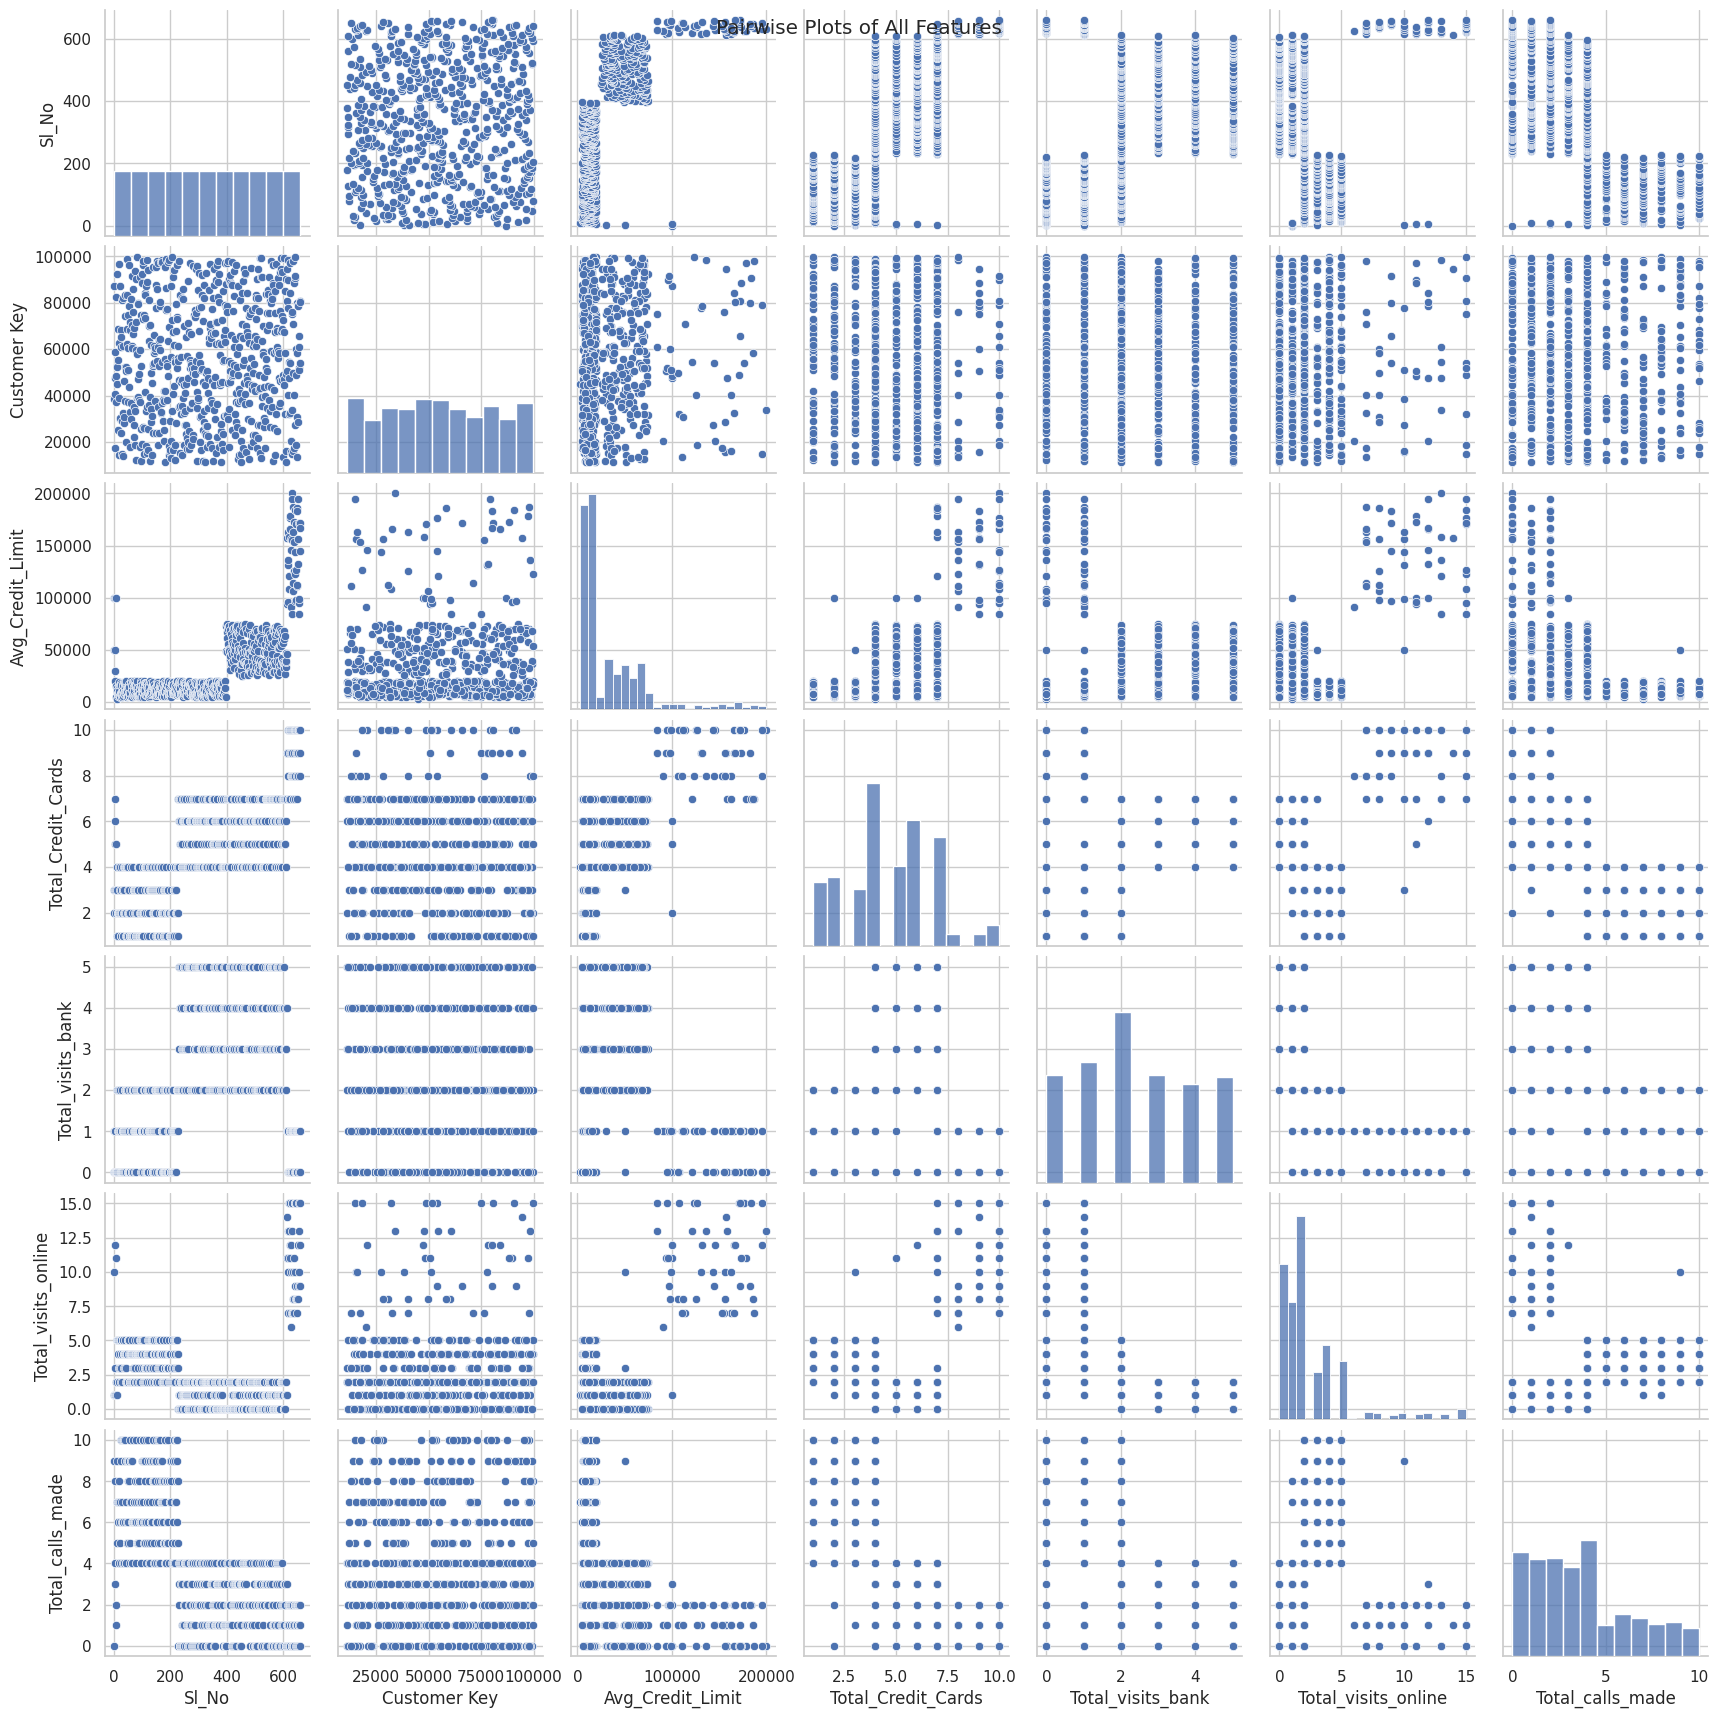

In [33]:
# Pair Plot
sns.pairplot(data)
plt.suptitle('Pairwise Plots of All Features')
plt.show()



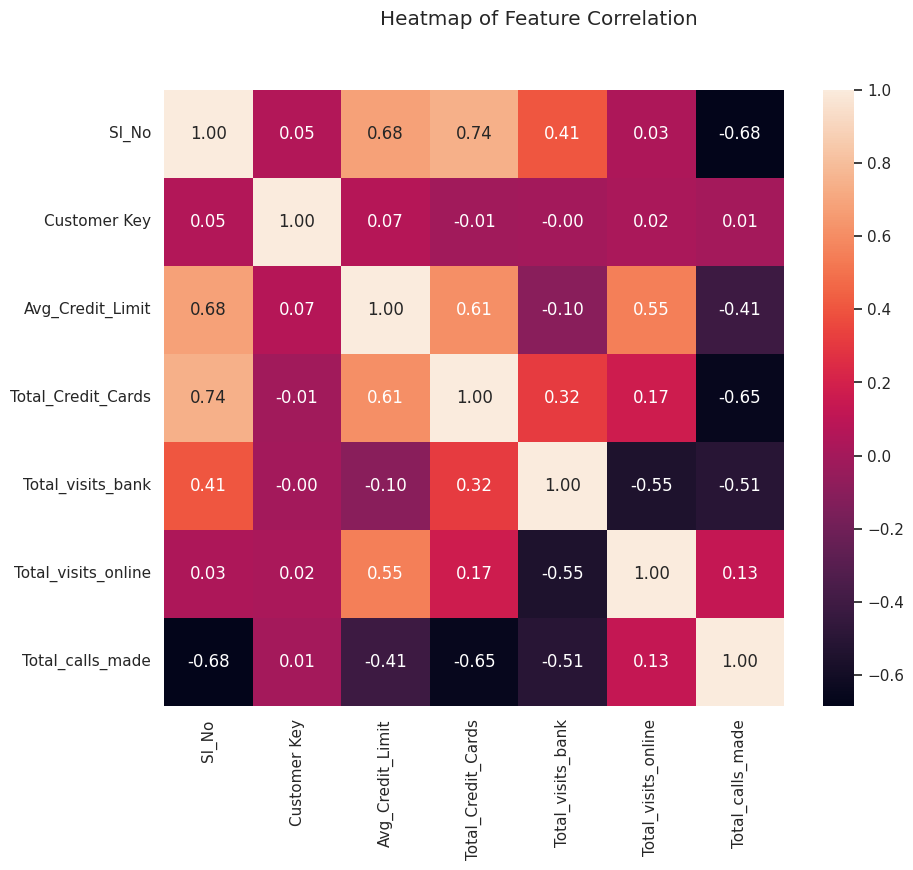

In [34]:
# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.suptitle('Heatmap of Feature Correlation')
plt.show()

In [44]:
from sklearn.feature_selection import VarianceThreshold

# 1. Removing highly correlated features
# Calculate the correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than a threshold (e.g., 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
data_reduced = data.drop(to_drop, axis=1)

# 2. Variance Threshold
selector = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
data_var_reduced = pd.DataFrame(selector.fit_transform(data_reduced), columns=data_reduced.columns[selector.get_support()])



data_var_reduced = data_var_reduced.drop(['Sl_No'], axis=1)

# Encode categorical columns
categorical_cols = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
data_var_reduced[categorical_cols] = data_var_reduced[categorical_cols].astype('category')

# Normalize continuous columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
continuous_cols = ['Avg_Credit_Limit']
data_var_reduced[continuous_cols] = scaler.fit_transform(data_var_reduced[continuous_cols])



print(data_var_reduced.head())

   Customer Key  Avg_Credit_Limit Total_Credit_Cards Total_visits_bank  \
0         87073          0.492386                  2                 1   
1         38414          0.238579                  3                 0   
2         17341          0.238579                  7                 1   
3         40496          0.137056                  5                 1   
4         47437          0.492386                  6                 0   

  Total_visits_online Total_calls_made  
0                   1                0  
1                  10                9  
2                   3                4  
3                   1                4  
4                  12                3  


<ipython-input-44-4aed8422ef09>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


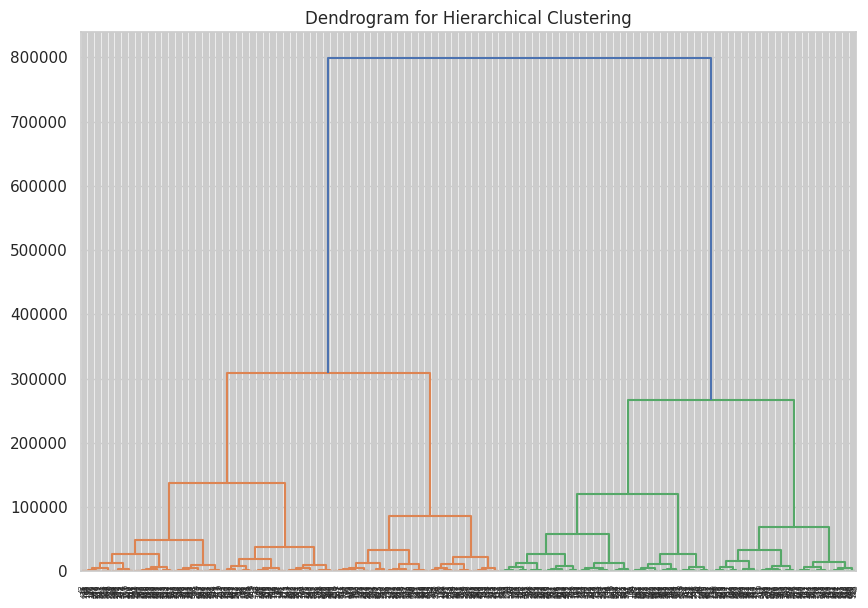

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Creating the Dendrogram to help decide the number of clusters
linked = linkage(data_var_reduced, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [47]:
# 2. Applying Hierarchical Clustering
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_var_reduced)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


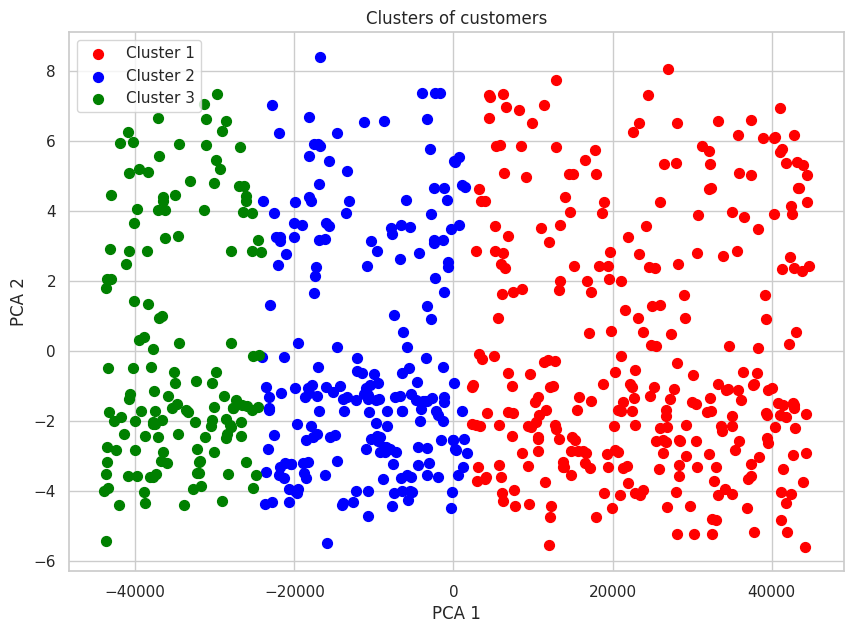

In [48]:
# 3. Visualizing the Clusters (if the data is more than 2-dimensional, use PCA to reduce it to 2 dimensions first)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_var_reduced)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s=50, c='green', label ='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()